## Binary classification models


## XGBoost

AUC-ROC Score: 0.9208


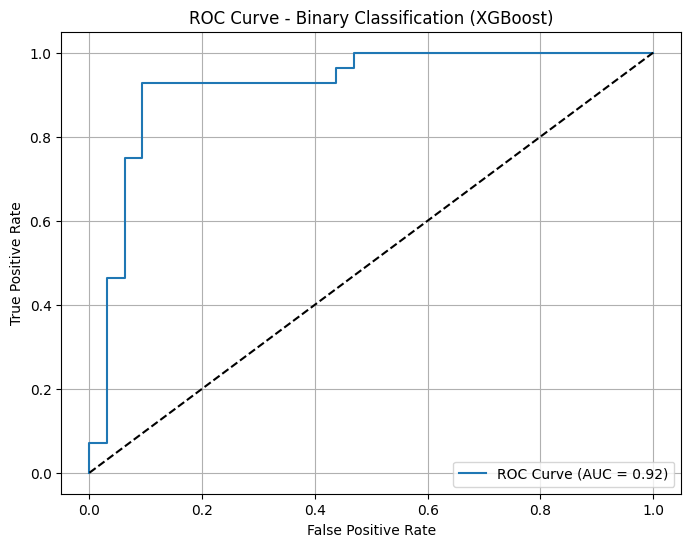

Confusion Matrix:
 [[29  3]
 [ 2 26]]
Accuracy: 0.9166666666666666
Precision: 0.9173155357804968
Recall: 0.9166666666666666
F1-score: 0.9167362851573377

 Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



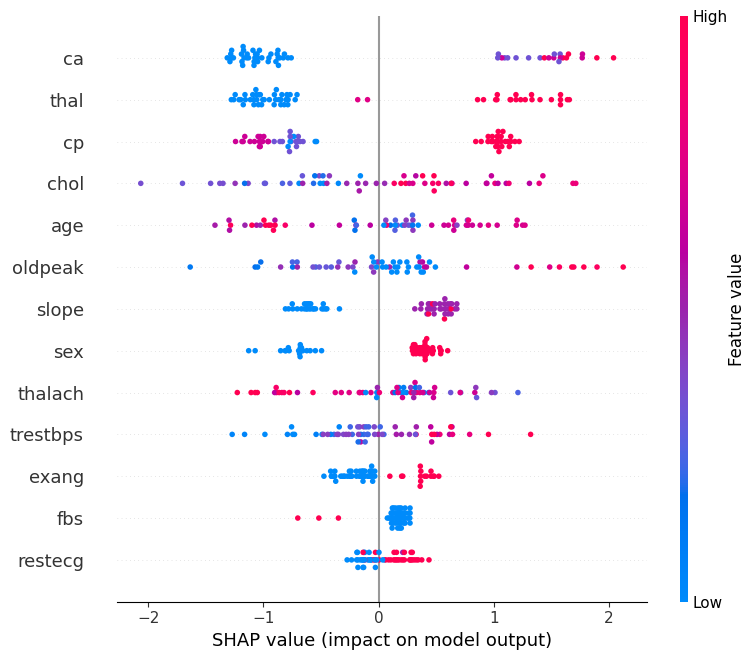

<Figure size 2000x1000 with 0 Axes>

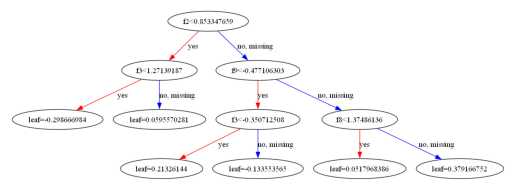

In [9]:
import warnings
import pandas as pd
import numpy as np
import random
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import shap
import matplotlib.pyplot as plt

#  تعطيل التحذيرات
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#  تحميل البيانات
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")
data = data.replace('NaN', np.nan).dropna().astype(float)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)  # تحويل إلى Binary

#  تقسيم البيانات
X = data.drop(columns=['num']).values
y = data['num'].values
np.random.seed(42)
random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#  تطبيع الميزات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  إعداد بيانات XGBoost
xgtrain = xgb.DMatrix(X_train, label=y_train)
xgtest = xgb.DMatrix(X_test, label=y_test)

#  إعدادات النموذج
params = {
    'objective': 'binary:logistic',
    'eta': 0.2575,
    'max_depth': 3,
    'colsample_bytree': 0.625,
    'subsample': 0.5,
    'min_child_weight': 1,
    'gamma': 0.75,
    'eval_metric': 'merror'
}

# تدريب النموذج
xgb_model_BIN= xgb.train(params, xgtrain, num_boost_round=150)

#  التنبؤ بالاحتمالات والتصنيفات
y_pred_proba = xgb_model_BIN.predict(xgtest)
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_proba]
#  التقييم بالأرقام
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

#  AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")

# منحنى ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # خط عشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification (XGBoost)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  عرض نتائج التقييم
print('Confusion Matrix:\n', conf_matrix)
print("Accuracy:", acc)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("\n Classification Report for XGBoost:")
print(classification_report(y_test, y_pred))

#  تحليل SHAP
explainer = shap.TreeExplainer(xgb_model_BIN)
shap_values = explainer.shap_values(X_test)

#  عرض ملخص SHAP
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])

# عرض شجرة XGBoost 
plt.figure(figsize=(20, 10))
xgb.plot_tree(xgb_model_BIN, num_trees=1)
plt.show()
# نأخذ اسماء الميزات
feature_names = data.drop(columns=["num"]).columns

# نحسب قيم SHAP
explainer = shap.TreeExplainer(xgb_model_BIN)
shap_values = explainer(X_test)  # ← هذا يرجع Explanation object مباشرة




## MLP

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5287 - loss: 0.6855 - val_accuracy: 0.2917 - val_loss: 1.0026
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5800 - loss: 0.6624 - val_accuracy: 0.3333 - val_loss: 0.9656
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6387 - loss: 0.6430 - val_accuracy: 0.3333 - val_loss: 0.9319
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6617 - loss: 0.6259 - val_accuracy: 0.3333 - val_loss: 0.9024
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6921 - loss: 0.6104 - val_accuracy: 0.3750 - val_loss: 0.8766
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7239 - loss: 0.5961 - val_accuracy: 0.4167 - val_loss: 0.8545
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7425 - loss: 0.5832 - val_accuracy: 0.4167 - val_loss: 0.8357
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7533 - loss: 0.5712 - val_accuracy: 0.5417 - val_loss: 0.8195
Epoch 

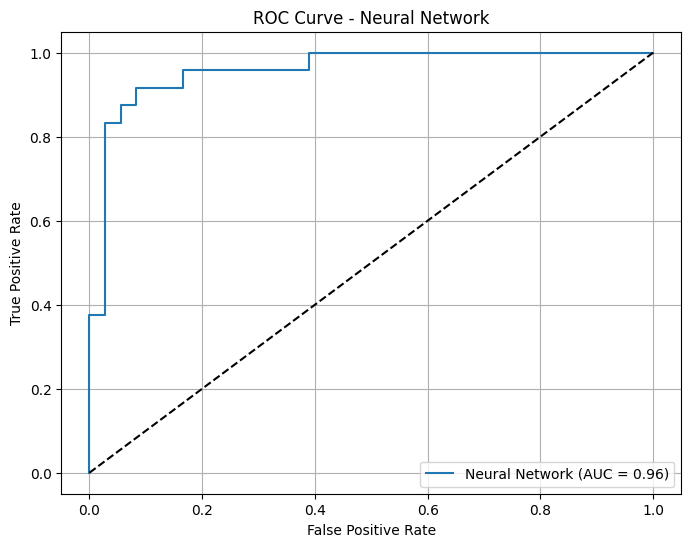

Confusion Matrix:
 [[33  3]
 [ 2 22]]
 Accuracy: 0.9167
 Precision: 0.9177
 Recall: 0.9167
 F1-score: 0.9169
Classification Report for NN:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        36
           1       0.88      0.92      0.90        24

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



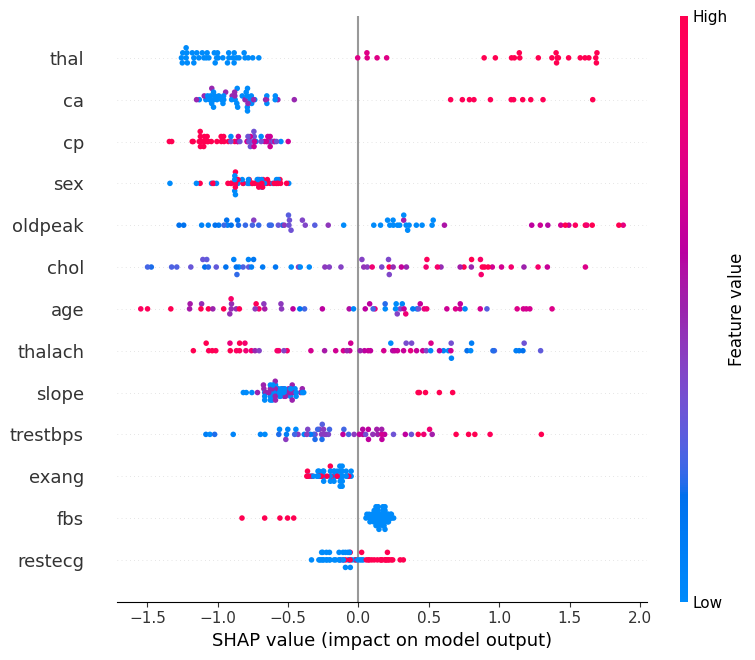

In [10]:

import pandas as pd
import tensorflow as tf
import numpy as np
import random
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers, regularizers

#  تحميل البيانات
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")

# استبدال القيم المفقودة
data = data.replace('NaN', np.nan).dropna().astype(float)

#  تقسيم البيانات إلى ميزات وهدف  
x = data.drop(columns=['num']).values
y = data['num'].values

y=np.where(y>0,1,0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# تحويل الميزات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# تحويل الأهداف إلى فئات
y_train_categorical = to_categorical(y_train, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)# ضبط العشوائية
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
# بناء نموذج الشبكة العصبية
model = Sequential()
model.add(Dense(15, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))  # الخرج، مفترض أنه تصنيف متعدد الفئات

 # اختيار المحسن (Optimizer)
optimizer = Adam(learning_rate=0.0005623)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# تدريب النموذج مع موازنة الأوزان
model.fit(X_train, y_train_categorical, epochs=50, batch_size=32,
           validation_split=0.1, shuffle=False, class_weight=dict(enumerate(class_weights)))


#  التنبؤات

y_pred_classes_nn = model.predict(X_test).argmax(axis=1)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y_probs_nn = model.predict(X_test)[:, 1]

# حساب AUC
auc_nn = roc_auc_score(y_test, y_probs_nn)
print(f"AUC Score: {auc_nn:.4f}")

# رسم منحنى ROC
fpr, tpr, _ = roc_curve(y_test, y_probs_nn)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# حساب المقاييس
accuracy = accuracy_score(y_test, y_pred_classes_nn)
precision = precision_score(y_test, y_pred_classes_nn, average='weighted')
recall = recall_score(y_test, y_pred_classes_nn, average='weighted')
f1 = f1_score(y_test, y_pred_classes_nn, average='weighted')
cm=confusion_matrix(y_test,y_pred_classes_nn )
# طباعة النتائج لكل تجربة
print('Confusion Matrix:\n',cm)
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-score: {f1:.4f}")
print("Classification Report for NN:")
print(classification_report(y_test,y_pred_classes_nn))
shap_values = explainer(X_test)
shap.summary_plot(shap_values.values, X_test, feature_names=data.columns[:-1])
 

## GradientBoosting

AUC Score (GBM): 0.902


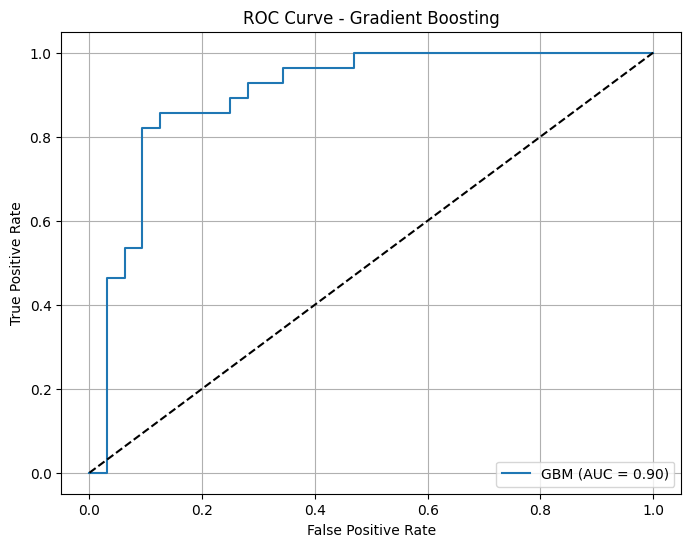

Confusion Matrix (GBM):
[[29  3]
 [ 5 23]]

 Accuracy (GBM):  0.8666666666666667
precision (GBM):  0.8677224736048265
 recall (GBM):  0.8666666666666667
f1 (GBM):  0.8662177328843995

 Classification Report (GBM):
Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



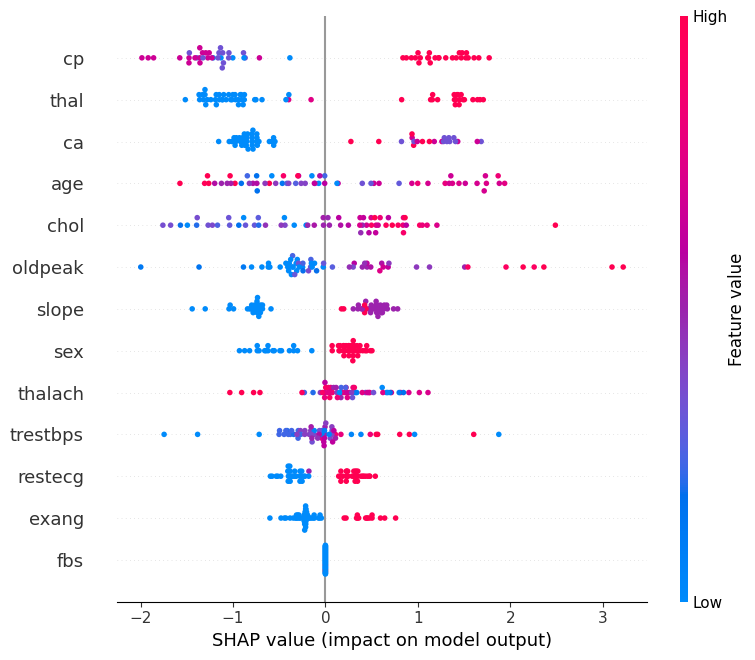

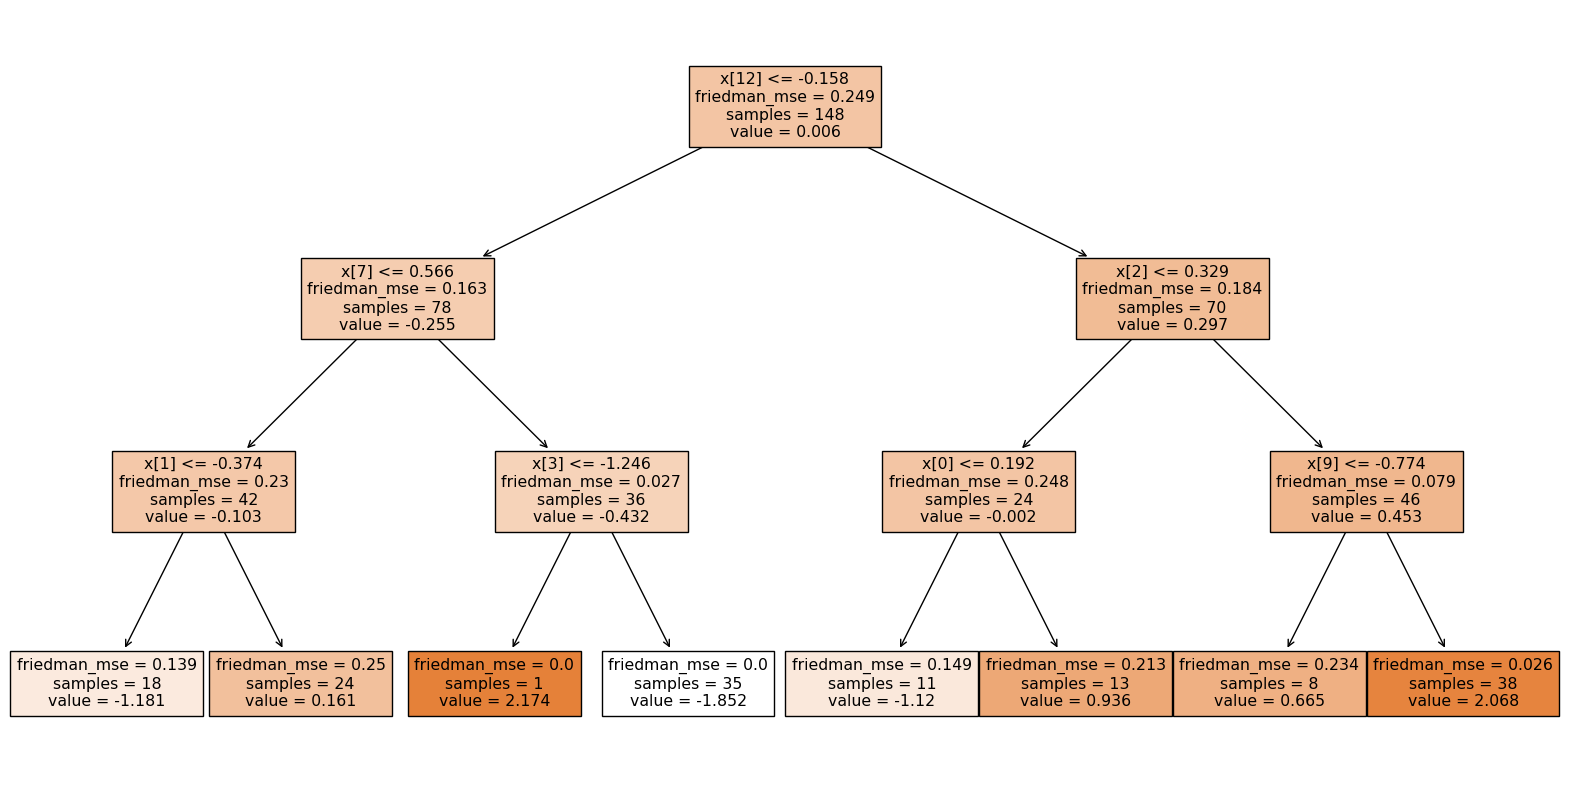

In [11]:
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# استبدال القيم المفقودة
data = data.replace('NaN', np.nan)
data = data.dropna()
data = data.astype(float)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)
# فصل الميزات عن الهدف
x = data.drop(columns=['num']).values  
y = data['num'].values  # الهدف

# ضبط العشوائية
np.random.seed(42)
random.seed(42)

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#  إنشاء النموذج وتدريبه
gbm_model= GradientBoostingClassifier(learning_rate= 0.3,
    max_depth=3,
    min_samples_split=5,
    n_estimators=50,
    subsample= 0.625
)
x2=gbm_model.fit(X_train, y_train)

#  التنبؤ
y_pred = gbm_model.predict(X_test)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# نحصل على احتمالات التنبؤ (احتمال أن العينة تنتمي للفئة 1)
y_probs = gbm_model.predict_proba(X_test)[:, 1]

# نحسب AUC
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score (GBM): {auc_score:.3f}")

# نرسم منحنى ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'GBM (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # خط عشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
#  طباعة المخرجات
print("Confusion Matrix (GBM):")
print(confusion_matrix(y_test, y_pred))
accuracy_gbm = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm=confusion_matrix(y_test,y_pred )
print("\n Accuracy (GBM): ", accuracy_gbm)
print("precision (GBM): ", precision)
print(" recall (GBM): ",recall)
print("f1 (GBM): ", f1)
print("\n Classification Report (GBM):")

# تقرير الأداء الكامل
print("Classification Report for GBM:")
print(classification_report(y_test, y_pred))

# تحليل SHAP
explainer = shap.TreeExplainer(gbm_model)
shap_values = explainer.shap_values(X_test)

# عرض نتائج SHAP
shap.summary_plot(shap_values, X_test, feature_names=data.columns[:-1])
plt.figure(figsize=(20, 10))
from sklearn.tree import plot_tree
plot_tree(gbm_model.estimators_[0, 0], filled=True)  # عرض الشجرة الأولى في النموذج
plt.show()

## Five Classification Models

## XGBoost

Shape: (60, 5)
First row: [0.5023756  0.1411187  0.12621588 0.10526191 0.12502785]
Sum of row: 0.99999994
Macro AUC-ROC Score: 0.7781060995140234


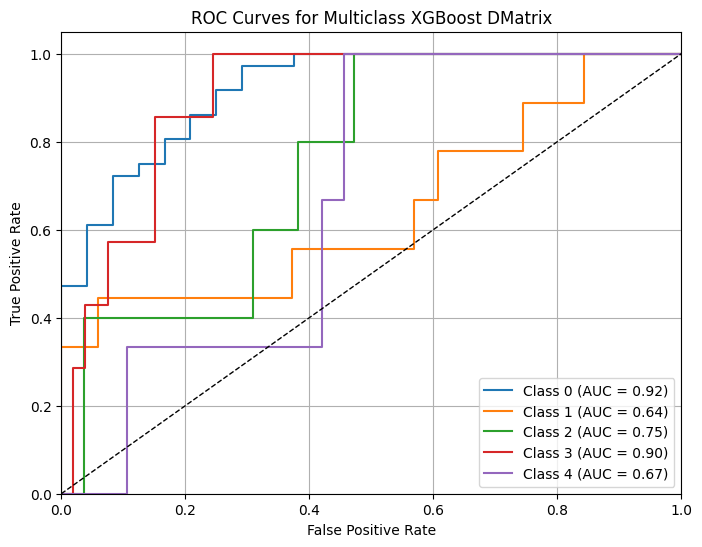

Confusion Matrix:
 [[36  0  0  0  0]
 [ 4  3  1  0  1]
 [ 2  0  2  1  0]
 [ 1  0  3  3  0]
 [ 1  1  0  1  0]]
XGBoost Accuracy: 0.7333333333333333
Weighted Precision: 0.7011868686868686
Weighted Recall: 0.7333333333333333
Weighted F1-Score: 0.6978671328671329
Classification Report for Multiclass XGBoost DMatrix:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        36
         1.0       0.75      0.33      0.46         9
         2.0       0.33      0.40      0.36         5
         3.0       0.60      0.43      0.50         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.73        60
   macro avg       0.50      0.43      0.45        60
weighted avg       0.70      0.73      0.70        60



<Figure size 2000x1000 with 0 Axes>

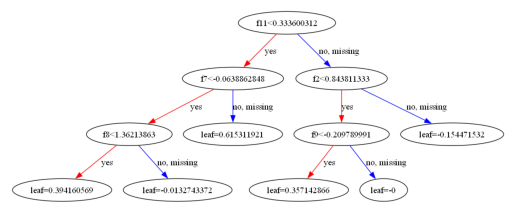

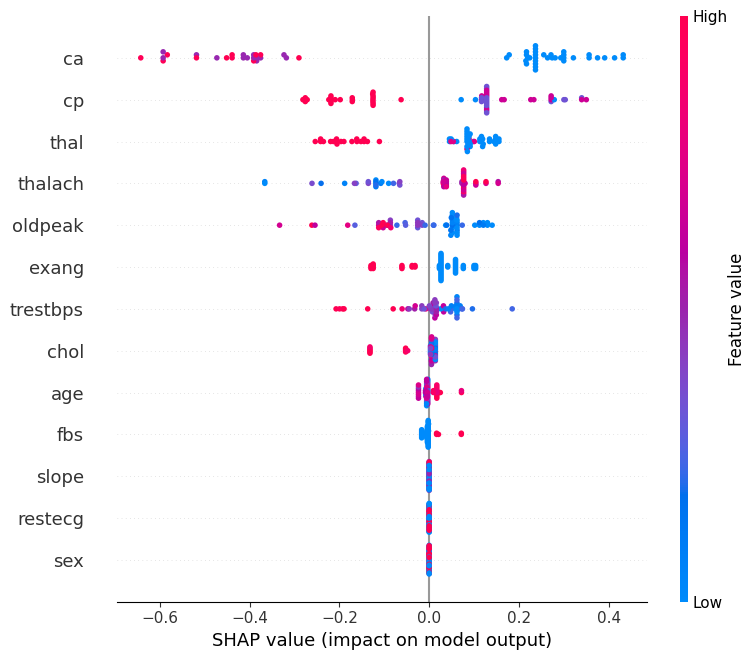

In [12]:
import pandas as pd
import numpy as np
import random
import shap
import xgboost as xgb
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# تحميل البيانات
data = pd.read_csv("C:/processed_cleveland_heart_data.csv")
data = data.dropna().astype(float)

# تقسيم الميزات والهدف
X = data.drop(columns=["num"]).values
y = data["num"].values

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيع الميزات

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# تحويل البيانات لـ DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# إعدادات XGBoost
params = {
    'objective': 'multi:softprob',
    'num_class': 5,
    'eta': 0.3,
    'max_depth': 4,
    'min_child_weight': 3,
    'gamma': 0.25,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'eval_metric': 'mlogloss'
}

# تدريب النموذج
xgb_model = xgb.train(params, dtrain, num_boost_round=3)

# التنبؤ بالاحتمالات
y_pred_proba = xgb_model.predict(dtest)

# التأكد من شكل التنبؤات
print("Shape:", y_pred_proba.shape)
print("First row:", y_pred_proba[0])
print("Sum of row:", np.sum(y_pred_proba[0]))

# حساب AUC
n_classes = 5
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
auc_score = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print("Macro AUC-ROC Score:", auc_score)
# رسم منحنيات ROC لكل كلاس
from sklearn.metrics import roc_curve, auc

# حساب fpr و tpr لكل كلاس
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], th = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# الرسم
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # خط عشوائي
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass XGBoost DMatrix')
plt.legend(loc="lower right")
plt.grid()
plt.show()
# تحويل الاحتمالات إلى تصنيفات
y_pred = np.argmax(y_pred_proba, axis=1)


# التقييم
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("XGBoost Accuracy:", accuracy)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1-Score: {f1}")
print("Classification Report for Multiclass XGBoost DMatrix:")
print(classification_report(y_test, y_pred))
# عرض شجرة من النموذج
plt.figure(figsize=(20, 10))
xgb.plot_tree(xgb_model, num_trees=0)
plt.show()

# تحليل SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(dtest)

# ملخص SHAP للفئة 0 (تقدري تغيري الرقم لو تبي)
shap.summary_plot(shap_values.values[:, :, 0], X_test, feature_names=data.columns[:-1])




## XGBClassifier

Shape of predictions: (60, 5)
First row of predictions: [0.9748788  0.01703231 0.00169882 0.00324627 0.00314376]
Sum of first row: 1.0
auc : 0.8214493178368818


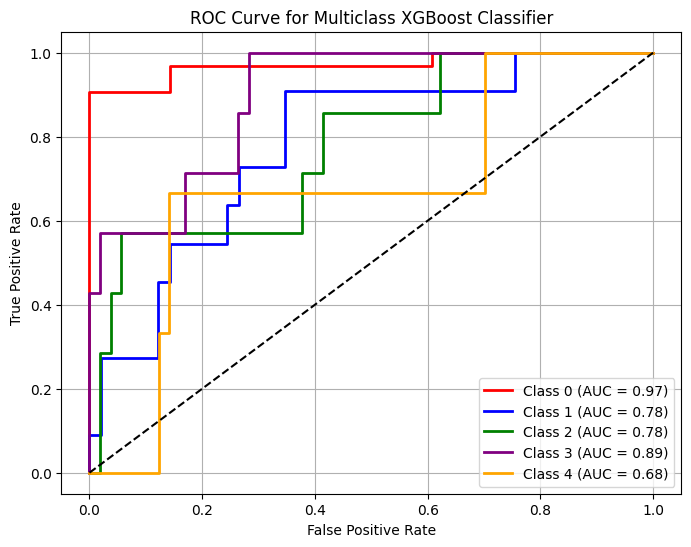

Confusion Matrix:
 [[30  2  0  0  0]
 [ 4  6  1  0  0]
 [ 0  3  3  1  0]
 [ 0  1  1  4  1]
 [ 0  1  1  1  0]]
XGBoost Accuracy: 0.7166666666666667
Weighted Precision: 0.6913147310206134
Weighted Recall: 0.7166666666666667
Weighted f1: 0.7021561771561771
Classification Report for XGBoost:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91        32
         1.0       0.46      0.55      0.50        11
         2.0       0.50      0.43      0.46         7
         3.0       0.67      0.57      0.62         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.72        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.69      0.72      0.70        60



In [13]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# تحميل البيانات
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")

# استبدال القيم المفقودة
data = data.replace('NaN', np.nan)
data = data.dropna()
data = data.astype(float)

# فصل الميزات عن الهدف
x = data.drop(columns=['num']).values  # إزالة العمود المستهدف
y = data['num'].values  # الهدف

# ضبط العشوائية
np.random.seed(42)
random.seed(42)

# تقسيم البيانات إلى تدريب واختبار
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# مقياس الميزات
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


xgb_clf = XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    learning_rate=0.7,
    max_depth=6,
    min_child_weight=3,
    gamma=0.9,
    subsample=0.7,
    colsample_bytree=0.6,
    eval_metric='merror',
    n_estimators=15,  
    random_state=42,
    use_label_encoder=False
)


# تحديث النموذج باستخدام أفضل عدد جولات
xgb_clf.set_params(n_estimators=15)

# إعادة التدريب باستخدام أفضل عدد جولات
x1=xgb_clf.fit(X_train, y_train)

# التنبؤ على بيانات الاختبار
y_pred_xgb = xgb_clf.predict_proba(X_test)
print("Shape of predictions:", y_pred_xgb.shape)
print("First row of predictions:", y_pred_xgb[0])
print("Sum of first row:", np.sum(y_pred_xgb[0]))
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# تحويل y_test إلى الشكل الثنائي One-vs-Rest
n_classes = 5
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

auc_score = roc_auc_score(y_test_bin, y_pred_xgb, average='macro', multi_class='ovr')
print("auc :", auc_score)
# حساب ROC و AUC لكل كلاس
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم منحنيات ROC
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, color in enumerate(colors[:n_classes]):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # الخط العشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

y_pred_xgb = np.argmax(y_pred_xgb, axis=1)
# تقييم النموذج
xgb_acc = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# طباعة النتائج
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))
print("XGBoost Accuracy:", xgb_acc)
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted f1: {f1}")

# تقرير الأداء الكامل
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# تحليل SHAP
# explainer = shap.TreeExplainer(xgb_clf)
# shap_values = explainer.shap_values(X_test)

# # عرض نتائج SHAP
# shap.summary_plot(shap_values[:,:,0], X_test, feature_names=data.columns[:-1])
# plt.figure(figsize=(20, 10))
# xgb.plot_tree(xgb_clf, num_trees=1)  # عرض الشجرة الأولى في النموذج
# plt.show()

## MLP

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
auc 0.7922257097637084


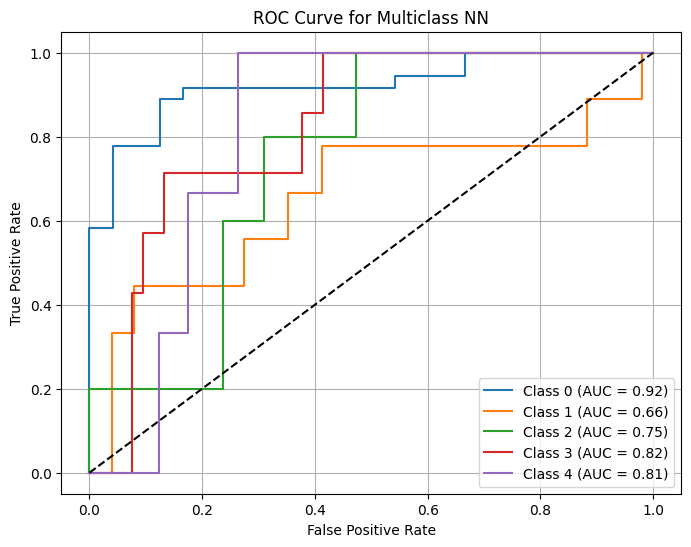


✅ Final Test Accuracy: 0.6667
Precision: 0.6758
Recall: 0.6667
F1-score: 0.6641

Confusion Matrix:
[[32  0  0  2  2]
 [ 2  3  0  2  2]
 [ 0  1  0  1  3]
 [ 1  1  0  4  1]
 [ 0  1  0  1  1]]
Classification Report for NN:
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90        36
         1.0       0.50      0.33      0.40         9
         2.0       0.00      0.00      0.00         5
         3.0       0.40      0.57      0.47         7
         4.0       0.11      0.33      0.17         3

    accuracy                           0.67        60
   macro avg       0.39      0.43      0.39        60
weighted avg       0.68      0.67      0.66        60



In [14]:
import pandas as pd
import tensorflow as tf
import numpy as np
import random
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import layers, regularizers

#  تحميل البيانات
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")

# استبدال القيم المفقودة
data = data.replace('NaN', np.nan).dropna().astype(float)

# تقسيم البيانات إلى ميزات وهدف  
x = data.drop(columns=['num']).values
y = data['num'].values

# ضبط العشوائية
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#  تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# موازنة الأوزان
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

#  تحويل الميزات
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  تحويل الأهداف إلى فئات (One-Hot Encoding)
y_train_categorical = to_categorical(y_train, num_classes=5)
y_test_categorical = to_categorical(y_test, num_classes=5)

# بناء نموذج الشبكة العصبية
model = Sequential([
    layers.Dense(16, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(16, activation='tanh', kernel_regularizer=regularizers.l1(0.005)),
    layers.Dense(5, activation='softmax')  # الطبقة الأخيرة تحتوي على 5 تصنيفات
])

# اختيار  (Optimizer)
optimizer = Adam(learning_rate=0.0005623413251903491)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# تدريب النموذج بدون طباعة كل epoch
model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.1, verbose=0, shuffle=True, class_weight=dict(enumerate(class_weights)))

#  التنبؤات على بيانات الاختبار
y_pred_probs = model.predict(X_test)  # احتمالات التنبؤ
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
auc_score=roc_auc_score(y_test_bin,y_pred_probs,average='macro', multi_class='ovr')
print('auc',auc_score)
# حساب ROC و AUC لكل كلاس
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم منحنيات ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # الخط العشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
y_pred_classes_nn = y_pred_probs.argmax(axis=1)  # تحويل الاحتمالات إلى تصنيفات نهائية

#  حساب الدقة، الدقة الإيجابية، الاسترجاع، ومصفوفة الالتباس
accuracy = accuracy_score(y_test, y_pred_classes_nn)
precision = precision_score(y_test, y_pred_classes_nn, average='weighted')
recall = recall_score(y_test, y_pred_classes_nn, average='weighted')
f1 = f1_score(y_test, y_pred_classes_nn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes_nn)

#  طباعة النتائج
print(f"\n✅ Final Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("Classification Report for NN:")
print(classification_report(y_test,y_pred_classes_nn))
 
# # إنشاء كائن SHAP Explainer باستخدام النموذج العصبي
# explainer = shap.Explainer(model, X_train)

# # حساب قيم SHAP لبيانات الاختبار
# shap_values = explainer(X_test)

# # عرض تحليل أهمية الميزات باستخدام Summary Plot
# shap.summary_plot(shap_values.values[:,:,0], X_test, feature_names=data.columns[:-1])




## GradientBoosting

Shape of predictions: (60, 5)
First row of predictions: [9.94032323e-01 5.45135998e-03 2.10499079e-04 3.03483307e-04
 2.33447199e-06]
Sum of first row: 1.0
AUC-ROC Score (Macro): 0.7823443859127112


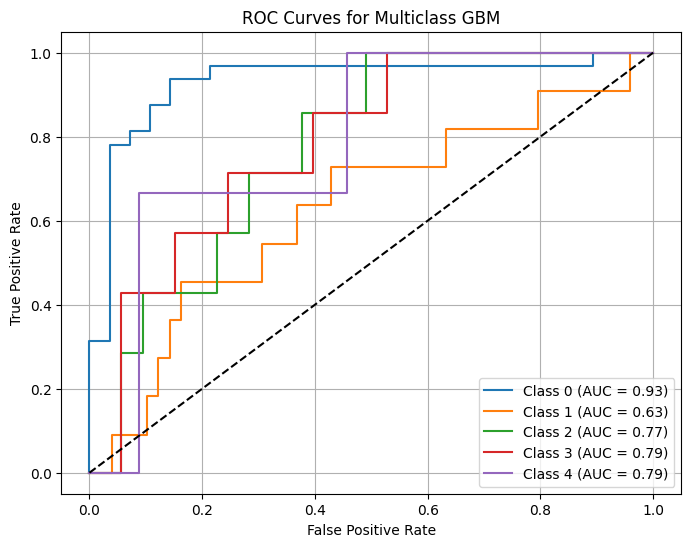

Confusion Matrix:
 [[29  3  0  0  0]
 [ 3  5  1  2  0]
 [ 1  4  2  0  0]
 [ 1  2  1  3  0]
 [ 0  1  1  1  0]]
Accuracy: 0.6500
Precision (Weighted): 0.6210
Recall (Weighted): 0.6500
F1-Score (Weighted): 0.6319
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        32
         1.0       0.33      0.45      0.38        11
         2.0       0.40      0.29      0.33         7
         3.0       0.50      0.43      0.46         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.42      0.42      0.41        60
weighted avg       0.62      0.65      0.63        60



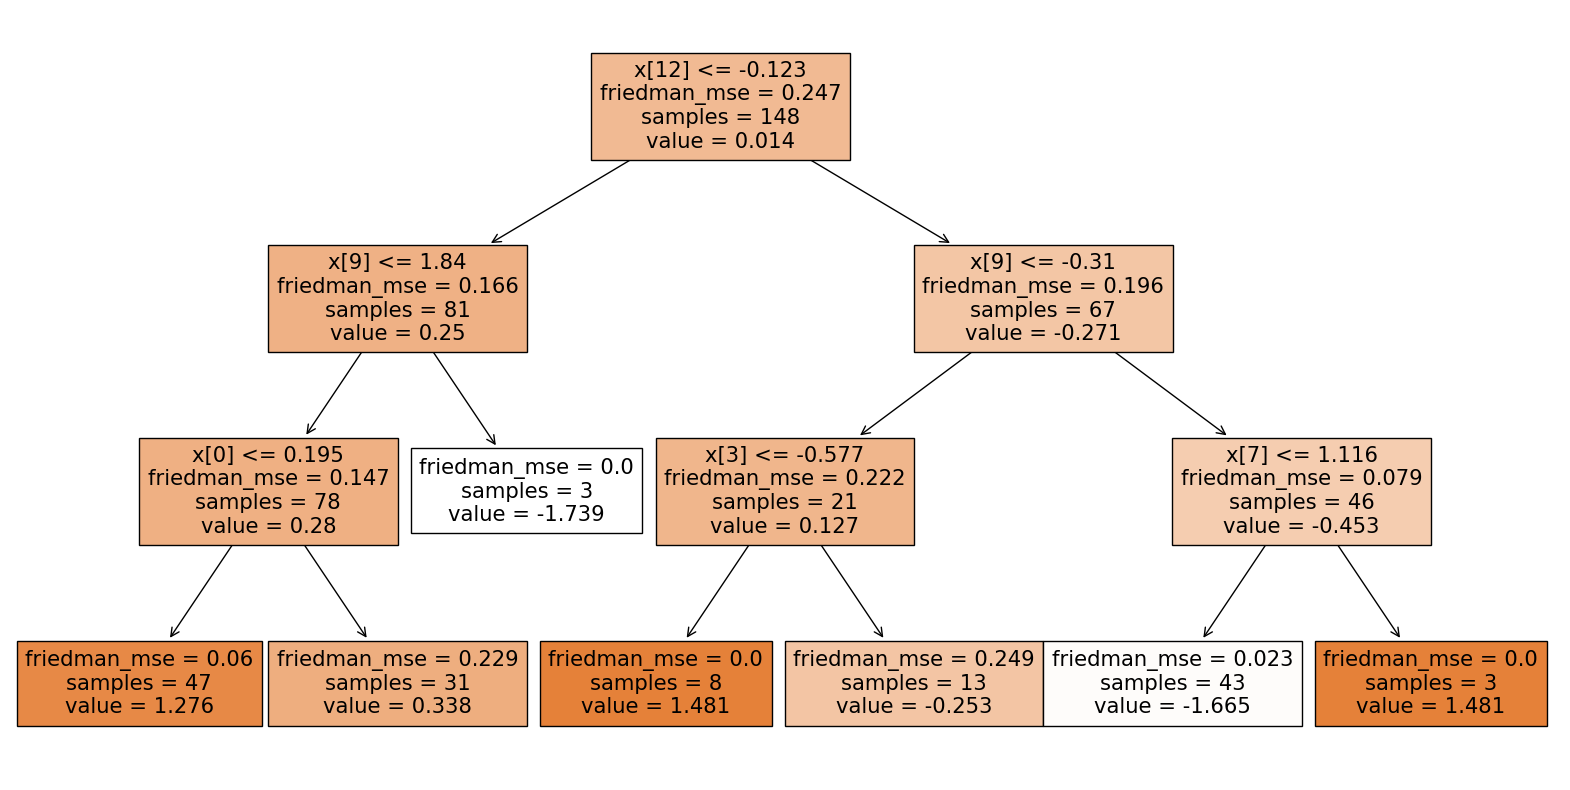

In [15]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (roc_curve, auc, roc_auc_score, accuracy_score, 
                             precision_score, recall_score, f1_score, confusion_matrix, classification_report)


# تحميل البيانات
data = pd.read_csv(r"C:/processed_cleveland_heart_data.csv")
data = data.replace('NaN', np.nan).dropna().astype(float)

# فصل الميزات والهدف
X = data.drop(columns=['num']).values
y = data['num'].values

np.random.seed(42)
random.seed(42)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#  إعداد نموذج GBM وتدريبه
gbm_model = GradientBoostingClassifier(
    learning_rate=0.2575,
    max_depth=3,
    min_samples_split=5,
    n_estimators=50,
    subsample=0.625,
    random_state=42
)

gbm_model.fit(X_train, y_train)


# التنبؤ بالاحتمالات
y_pred_proba = gbm_model.predict_proba(X_test)
print("Shape of predictions:", y_pred_proba.shape)
print("First row of predictions:", y_pred_proba[0])
print("Sum of first row:", np.sum(y_pred_proba[0]))

# حساب AUC-ROC
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
auc_score = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')
print('AUC-ROC Score (Macro):', auc_score)

# رسم منحنيات ROC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass GBM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# التنبؤ النهائي بالتصنيفات
y_pred = np.argmax(y_pred_proba, axis=1)

# التقييم
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# عرض الشجرة الأولى في GBM
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(gbm_model.estimators_[0, 0], filled=True)
plt.show()